### **Part 3**

Training the entire neural network with the same CNN architecture as in Part (1) by using our own augmented dataset


#### **[Task 0.0] : GPU Set up**

Add GPU accelerator by clicking
Runtime>Change runtime type > Hardware accelerator

Change from None to GPU


Following code block should pass without triggering asserts if you did it rightly.

**Caution: Do not proceed further until this code block passes**

***You are requested to ignore any warnings.***




In [ ]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(f"We are training on {device} for this experiment")

assert 'cuda' in repr(device), "GPU is not selected in hardware accelerator dropdown"

We are training on cuda:0 for this experiment


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### **[Task 0.1] : Google drive setup**
Create a folder '*checkpoints3*' in your google drive and make `your_google_drive_path` variable to point the '*checkpoints3*' folder.

Following code block should pass without triggering asserts if you did it rightly.

**Caution: Do not proceed further until this code block passes**

In [ ]:
your_google_drive_path = "/content/drive/MyDrive/checkpoints3/"
import os
assert os.path.isdir(your_google_drive_path), f"{your_google_drive_path} is not a valid location"


# Training a Classifier

This is it. You have seen how to define neural networks, compute loss and make
updates to the weights of the network.

Now you might be thinking,

## What about data?

Generally, when you have to deal with image, text, audio or video data,
you can use standard python packages that load data into a numpy array.
Then you can convert this array into a ``torch.*Tensor``.

-  For images, packages such as Pillow, OpenCV are useful
-  For audio, packages such as scipy and librosa
-  For text, either raw Python or Cython based loading, or NLTK and
   SpaCy are useful

Specifically for vision, we have created a package called
``torchvision``, that has data loaders for common datasets such as
ImageNet, CIFAR10, MNIST, etc. and data transformers for images, viz.,
``torchvision.datasets`` and ``torch.utils.data.DataLoader``.

This provides a huge convenience and avoids writing boilerplate code.

Our interest is in training our own augmented **Bengali MNIST** dataset.

In [ ]:
# importing the required libraries
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms

Creation of custom **Bengali MNIST** dataset in PyTorch to access all the functionalities of Dataloaders. \
We also normalized the pixel values such they lie in the range [0, 1]. \
Create a folder called *data* in your Google Drive and upload the *numbers.csv* file present in the *Dataset* folder attached alongwith the submission file, in the created folder. \
**Only after doing the above, run the cell below.**

In [ ]:
from torch.utils.data import Dataset, DataLoader
import numpy as np

class Bengali_MNIST(Dataset) :
  def __init__(self,transform=None) :
    xy = np.loadtxt('/content/drive/MyDrive/data/numbers.csv',delimiter=',',dtype=np.float32)
    self.x = torch.from_numpy(xy[:,1:].reshape((-1,1,28,28)))   # inputs
    self.x /= 255
    self.y = torch.from_numpy(xy[:,0])                          # labels
    self.n_samples = xy.shape[0]
    self.transform = transform

  def __getitem__(self,index) :                # indexing the dataset
    return self.x[index],self.y[index]

  def __len__(self) :                          # to obtain the length of the dataset 
    return self.n_samples

Obtaining training and test sets

In [ ]:
fraction = 0.9                                 # train-test split
batch_size = 4                                 # batch-size 

dataset = Bengali_MNIST(transform=None)        # dataset object 

# Creation of training and test sets
train_size = int(fraction * len(dataset))
test_size = len(dataset) - train_size
trainset, testset = torch.utils.data.random_split(dataset, [train_size, test_size])



#Create data loader from train dataset object
trainloader = DataLoader(trainset, batch_size=batch_size,shuffle=True, num_workers=2)

#Create data loader from test dataset object
testloader = DataLoader(testset, batch_size=batch_size,shuffle=False, num_workers=2)

classes = ('zero', 'one', 'two', 'three',
           'four', 'five', 'six', 'seven', 'eight', 'nine')

Let us show some of the training images, for fun.



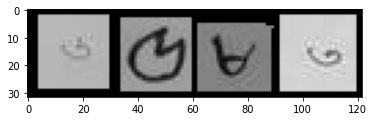

six   five  eight three


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    #img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
## Doubt: Why is this always showing 4 images?
dataiter = iter(trainloader)
images, labels = next(dataiter)
#print(images.shape)
#print(labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[int(labels[j].item())]:5s}' for j in range(batch_size)))

### 2. [Task 1] Define a Convolutional Neural Network with residual connections
Copy the neural network from your lab and output 10 classes in final layer of FC
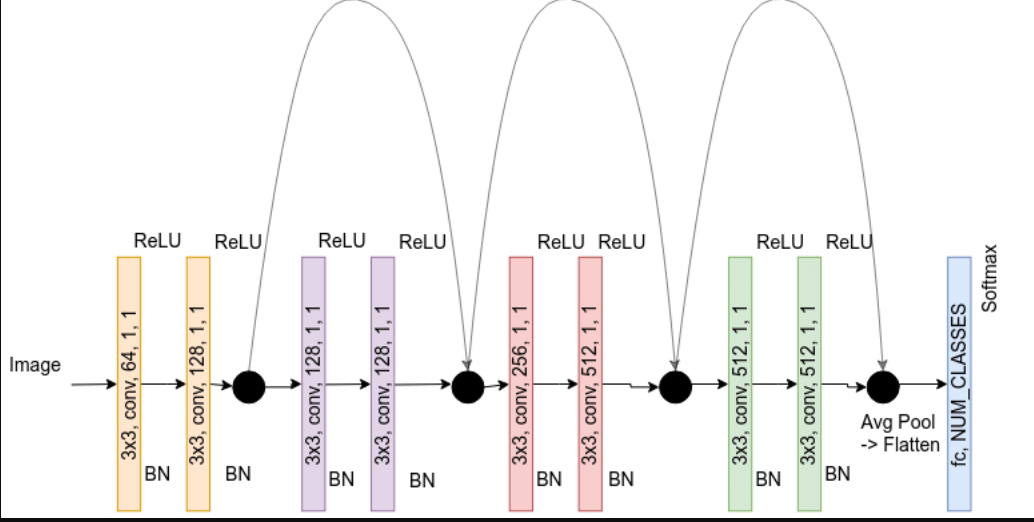



In [ ]:
import torch.nn as nn
import torch.nn.functional as F

#Define your own 'resnet9 without residual connections' neural network class with name 'Net' here 
#Note : 
######## Thou shall not use the following commented out Net() definition in final evaluation
######## This is placed here for you to play with incase your model class definition doesn't work


# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

class ResNet9(nn.Module):

    def __init__(self):
        super(ResNet9, self).__init__()
        self.conv1 = nn.Conv2d(1, 64, 3, padding=1, stride=1)
        self.bn1 = nn.BatchNorm2d(64,affine=True)
        self.conv2 = nn.Conv2d(64, 128, 3,padding=1, stride=1)
        self.bn2 = nn.BatchNorm2d(128,affine=True)
        self.conv3 = nn.Conv2d(128, 128, 3,padding=1, stride=1)
        self.conv4 = nn.Conv2d(128, 256, 3,padding=1, stride=1)
        self.bn3 = nn.BatchNorm2d(256,affine=True)
        self.conv5 = nn.Conv2d(256, 512, 3,padding=1, stride=1)
        self.bn4 = nn.BatchNorm2d(512,affine=True)
        self.conv6 = nn.Conv2d(512, 512, 3,padding=1, stride=1)
        self.activation = nn.ReLU(inplace=False)
        self.pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512, 10) 
        self.conv7 = nn.Conv2d(128,512,1,padding=0,stride=1) 

    def forward(self, x):
        x = self.activation(self.bn1(self.conv1(x)))
        x1 = self.activation(self.bn2(self.conv2(x)))

        x = self.activation(self.bn2(self.conv3(x1)))
        x2 = x1 + self.activation(self.bn2(self.conv3(x)))

        x = self.activation(self.bn3(self.conv4(x2)))
        x2_ = self.bn4(self.conv7(x2))
        x3 = x2_ + self.activation(self.bn4(self.conv5(x)))

        x = self.activation(self.bn4(self.conv6(x3)))
        x4 = x3 + self.activation(self.bn4(self.conv6(x)))

        x = self.pool(x4)   
        x = torch.flatten(x, 1) 


        x = self.fc(x)
        x = F.softmax(x)
        return x


net = ResNet9().to(device)
#print(net)
#net = Net().to(device)

### 3. Define a Loss function and optimizer
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.005, momentum=0.9)

### This is validator code

In [ ]:
def validator(testloader=None,net=None):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            labels = labels.type(torch.LongTensor)
            images = images.to(device)
            labels = labels.to(device)

            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            # perform max along dimension 1, since dimension 0 is batch dimension
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network on the {test_size} test images: {100 * correct // total} %')
    return correct/total

### 4. Train the network

This is when things start to get interesting.
We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [ ]:
start_epoch=0
end_epoch=20

#If you are resuming your model, Uncomment following lines

#checkpoint = torch.load(your_google_drive_path+'checkpoint.pth')
#start_epoch = checkpoint['epoch']+1
#net.load_state_dict(checkpoint['model_state_dict'])
#optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [ ]:
best_accuracy = -1.0
for epoch in range(start_epoch,end_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels = labels.type(torch.LongTensor)
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        #print(outputs.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print(f'[{epoch + 1}, {i + 1:4d}] loss: {running_loss / 500:.3f}')
            running_loss = 0.0
    
    current_accuracy = validator(testloader=testloader,net=net)
    if current_accuracy>best_accuracy:
        best_accuracy = current_accuracy
        
        torch.save(
            {'epoch':epoch, 
             'model_state_dict': net.state_dict(), 
             'optimizer_state_dict': optimizer.state_dict()
             }, 
             
             your_google_drive_path+'best_model.pth')
    
    #Save model as checkpoint
    torch.save(
        {'epoch':epoch, 
         'model_state_dict': net.state_dict(), 
         'optimizer_state_dict': optimizer.state_dict() 
         }, 
         your_google_drive_path+'checkpoint.pth') 



print('Finished Training')

<ipython-input-9-85e6c1892eb3>:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[1,  500] loss: 2.316
[1, 1000] loss: 2.303
[1, 1500] loss: 2.292
[1, 2000] loss: 2.261
Accuracy of the network on the 1000 test images: 24 %
[2,  500] loss: 2.140
[2, 1000] loss: 2.075
[2, 1500] loss: 2.034
[2, 2000] loss: 1.964
Accuracy of the network on the 1000 test images: 61 %
[3,  500] loss: 1.832
[3, 1000] loss: 1.772
[3, 1500] loss: 1.742
[3, 2000] loss: 1.708
Accuracy of the network on the 1000 test images: 80 %
[4,  500] loss: 1.679
[4, 1000] loss: 1.663
[4, 1500] loss: 1.655
[4, 2000] loss: 1.631
Accuracy of the network on the 1000 test images: 85 %
[5,  500] loss: 1.620
[5, 1000] loss: 1.619
[5, 1500] loss: 1.598
[5, 2000] loss: 1.556
Accuracy of the network on the 1000 test images: 91 %
[6,  500] loss: 1.542
[6, 1000] loss: 1.523
[6, 1500] loss: 1.518
[6, 2000] loss: 1.509
Accuracy of the network on the 1000 test images: 96 %
[7,  500] loss: 1.499
[7, 1000] loss: 1.496
[7, 1500] loss: 1.487
[7, 2000] loss: 1.489
Accuracy of the network on the 1000 test images: 97 %
[8,  5

### 5. Test the network on the test data

We have trained the network for `end_epoch` passes over the training dataset.
But we need to check if the network has learnt anything at all.

We will check this by predicting the class label that the neural network
outputs, and checking it against the ground-truth. If the prediction is
correct, we add the sample to the list of correct predictions.

Okay, first step. Let us display an image from the test set to get familiar.



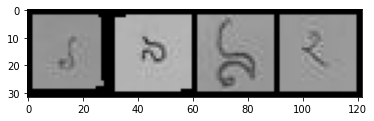

GroundTruth:  one   nine  nine  two  


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)
# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[int(labels[j].item())]:5s}' for j in range(batch_size)))

Load your best saved model and see what the neural network thinks these examples above are:

In [ ]:
net_best = ResNet9().to(device)
checkpoint = torch.load(your_google_drive_path+'best_model.pth')
net_best.load_state_dict(checkpoint['model_state_dict'])


images = images.to(device)
labels = labels.type(torch.LongTensor)
labels = labels.to(device)

outputs = net_best(images)

<ipython-input-9-85e6c1892eb3>:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(batch_size)))

Predicted:  one   nine  nine  two  


# [Task 2] : Optional
Modify following function to return "total accuracy" which is calculated from "class wise" accuracies and replace `validator()` function in training loop with `validator_classwise()` function.

In [ ]:
def validator_classwise(testloader=None,net=None, classes=None):
    # prepare to count predictions for each class
    correct_pred = {classname: 0 for classname in classes}
    total_pred = {classname: 0 for classname in classes}
    total_acc = 0
    total_size = 0

    # again no gradients needed
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)
            outputs = net(images)
            _, predictions = torch.max(outputs, 1)
            # collect the correct predictions for each class
            for label, prediction in zip(labels, predictions):
                if label == prediction:
                    correct_pred[classes[int(label.item())]] += 1
                total_pred[classes[int(label.item())]] += 1

    for classname in classes :
      total_size += total_pred[classname]


    # print accuracy for each class
    for classname, correct_count in correct_pred.items():
        accuracy = 100 * float(correct_count) / total_pred[classname]
        total_acc += ((accuracy*total_pred[classname])/total_size)
        print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')
    
    return total_acc #your total accuracy variable

#Test your logic by uncommenting following line
validator_classwise(testloader=testloader,net=net_best, classes=classes)

<ipython-input-9-85e6c1892eb3>:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


Accuracy for class: zero  is 100.0 %
Accuracy for class: one   is 100.0 %
Accuracy for class: two   is 100.0 %
Accuracy for class: three is 100.0 %
Accuracy for class: four  is 100.0 %
Accuracy for class: five  is 99.1 %
Accuracy for class: six   is 97.0 %
Accuracy for class: seven is 100.0 %
Accuracy for class: eight is 100.0 %
Accuracy for class: nine  is 100.0 %


99.6

#[Task 3] : Optional
Tune `batch_size` for full GPU utilization. \
In the case of this particular dataset, the cell below prints the batch-size which, when used, makes efficient use of the GPU.

In [ ]:
import typing as t
def get_batch_size(
    model: nn.Module,
    device: torch.device,
    input_shape: t.Tuple[int, int, int],
    output_shape: t.Tuple[int],
    dataset_size: int,
    max_batch_size: int = None,
    num_iterations: int = 5,
) -> int:
    model.to(device)
    model.train(True)
    optimizer = torch.optim.Adam(model.parameters())

    batch_size = 2
    while True:
        if max_batch_size is not None and batch_size >= max_batch_size:
            batch_size = max_batch_size
            break
        if batch_size >= dataset_size:
            batch_size = batch_size // 2
            break
        try:
            for _ in range(num_iterations):
                # dummy inputs and targets
                inputs = torch.rand(*(batch_size, *input_shape), device=device)
                targets = torch.rand(*(batch_size, *output_shape), device=device)
                outputs = model(inputs)
                loss = criterion(targets, outputs)
                loss.backward()
                optimizer.step()
                optimizer.zero_grad()
            batch_size *= 2
        except RuntimeError:
            batch_size //= 2
            break
    del model, optimizer
    torch.cuda.empty_cache()
    return batch_size

print(get_batch_size(ResNet9(),'cuda',(1,28,28),(10,),10000,20))

<ipython-input-9-85e6c1892eb3>:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


20


### **Part 4.1**
#### **Transfer Learning** by training only the last fully-connected layer


####**Google drive setup**
Create a folder '*checkpoints4*' in your google drive. \
**Run the below cells only after creating the above folder.**

Load your best saved model of **Part 1** (original MNIST) to use those already trained parameters.

In [ ]:
net_best = ResNet9().to(device)
checkpoint = torch.load('/content/drive/MyDrive/checkpoints2/'+'best_model.pth')
net_best.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

Freezing all the layers of the neural network except the last layer.

In [ ]:
'''for name,param in net_best.named_parameters():
  if 'fc' not in name :
    param.requires_grad = False'''

for param in net_best.parameters():
  param.requires_grad = False

net_best.fc = nn.Linear(512, 10)                   # redefining last layer to unfreeze it

net_best.to(device)

# printing the parameters' shapes and their requires_grad attributes
for param in net_best.parameters():
    print(param.shape, param.requires_grad)

torch.Size([64, 1, 3, 3]) False
torch.Size([64]) False
torch.Size([64]) False
torch.Size([64]) False
torch.Size([128, 64, 3, 3]) False
torch.Size([128]) False
torch.Size([128]) False
torch.Size([128]) False
torch.Size([128, 128, 3, 3]) False
torch.Size([128]) False
torch.Size([256, 128, 3, 3]) False
torch.Size([256]) False
torch.Size([256]) False
torch.Size([256]) False
torch.Size([512, 256, 3, 3]) False
torch.Size([512]) False
torch.Size([512]) False
torch.Size([512]) False
torch.Size([512, 512, 3, 3]) False
torch.Size([512]) False
torch.Size([10, 512]) True
torch.Size([10]) True
torch.Size([512, 128, 1, 1]) False
torch.Size([512]) False


### Define a Loss function and optimizer
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_best.parameters(), lr=0.010, momentum=0.9)

### Train the network

We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [ ]:
start_epoch=0
end_epoch=50

#If you are resuming your model, Uncomment following lines

#checkpoint = torch.load(your_google_drive_path+'checkpoint.pth')
#start_epoch = checkpoint['epoch']+1
#net.load_state_dict(checkpoint['model_state_dict'])
#optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [ ]:
best_accuracy = -1.0
for epoch in range(start_epoch,end_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels = labels.type(torch.LongTensor)
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net_best(inputs)
        #print(outputs.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print(f'[{epoch + 1}, {i + 1:4d}] loss: {running_loss / 500:.3f}')
            running_loss = 0.0
    
    current_accuracy = validator(testloader=testloader,net=net_best)
    if current_accuracy>best_accuracy:
        best_accuracy = current_accuracy
        
        torch.save(
            {'epoch':epoch, 
             'model_state_dict': net_best.state_dict(), 
             'optimizer_state_dict': optimizer.state_dict()
             }, 
             
             '/content/drive/MyDrive/checkpoints4/'+'best_model.pth')
    
    #Save model as checkpoint
    torch.save(
        {'epoch':epoch, 
         'model_state_dict': net_best.state_dict(), 
         'optimizer_state_dict': optimizer.state_dict() 
         }, 
         '/content/drive/MyDrive/checkpoints4/'+'checkpoint.pth') 



print('Finished Training')

<ipython-input-9-85e6c1892eb3>:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[1,  500] loss: 1.950
[1, 1000] loss: 1.965
[1, 1500] loss: 1.957
[1, 2000] loss: 1.958
Accuracy of the network on the 1000 test images: 47 %
[2,  500] loss: 1.965
[2, 1000] loss: 1.957
[2, 1500] loss: 1.961
[2, 2000] loss: 1.948
Accuracy of the network on the 1000 test images: 53 %
[3,  500] loss: 1.943
[3, 1000] loss: 1.955
[3, 1500] loss: 1.943
[3, 2000] loss: 1.960
Accuracy of the network on the 1000 test images: 50 %
[4,  500] loss: 1.952
[4, 1000] loss: 1.956
[4, 1500] loss: 1.967
[4, 2000] loss: 1.964
Accuracy of the network on the 1000 test images: 50 %
[5,  500] loss: 1.938
[5, 1000] loss: 1.961
[5, 1500] loss: 1.951
[5, 2000] loss: 1.975
Accuracy of the network on the 1000 test images: 49 %
[6,  500] loss: 1.953
[6, 1000] loss: 1.950
[6, 1500] loss: 1.965
[6, 2000] loss: 1.969
Accuracy of the network on the 1000 test images: 53 %
[7,  500] loss: 1.961
[7, 1000] loss: 1.965
[7, 1500] loss: 1.972
[7, 2000] loss: 1.935
Accuracy of the network on the 1000 test images: 51 %
[8,  5

### **Part 4.2**
#### **Transfer Learning** by freezing all except the last 2 layers


####**Google drive setup**
Create a folder '*checkpoints4*' in your google drive. \
**Run the below cells only after creating the above folder.**

Load your best saved model of **Part 1** (original MNIST) to use those already trained parameters.

In [ ]:
net_best = ResNet9().to(device)
checkpoint = torch.load('/content/drive/MyDrive/checkpoints2/'+'best_model.pth')
net_best.load_state_dict(checkpoint['model_state_dict'])

<All keys matched successfully>

Freezing all the layers of the neural network except the last layer.

In [ ]:
'''for name,param in net_best.named_parameters():
  if 'fc' not in name :
    param.requires_grad = False'''

for param in net_best.parameters():
  param.requires_grad = False

net_best.conv6 = nn.Conv2d(512, 512, 3,padding=1, stride=1)
net_best.fc = nn.Linear(512, 10)

net_best.to(device)

for param in net_best.parameters():
    print(param.shape, param.requires_grad)

#print(net_best.device)

torch.Size([64, 1, 3, 3]) False
torch.Size([64]) False
torch.Size([64]) False
torch.Size([64]) False
torch.Size([128, 64, 3, 3]) False
torch.Size([128]) False
torch.Size([128]) False
torch.Size([128]) False
torch.Size([128, 128, 3, 3]) False
torch.Size([128]) False
torch.Size([256, 128, 3, 3]) False
torch.Size([256]) False
torch.Size([256]) False
torch.Size([256]) False
torch.Size([512, 256, 3, 3]) False
torch.Size([512]) False
torch.Size([512]) False
torch.Size([512]) False
torch.Size([512, 512, 3, 3]) True
torch.Size([512]) True
torch.Size([10, 512]) True
torch.Size([10]) True
torch.Size([512, 128, 1, 1]) False
torch.Size([512]) False


### Define a Loss function and optimizer
Let's use a Classification Cross-Entropy loss and SGD with momentum.



In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net_best.parameters(), lr=0.010, momentum=0.9)

### Train the network

We simply have to loop over our data iterator, and feed the inputs to the
network and optimize.



In [ ]:
start_epoch=0
end_epoch=50

#If you are resuming your model, Uncomment following lines

#checkpoint = torch.load(your_google_drive_path+'checkpoint.pth')
#start_epoch = checkpoint['epoch']+1
#net.load_state_dict(checkpoint['model_state_dict'])
#optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [ ]:
best_accuracy = -1.0
for epoch in range(start_epoch,end_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        labels = labels.type(torch.LongTensor)
        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net_best(inputs)
        #print(outputs.shape)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 500 == 499:    # print every 500 mini-batches
            print(f'[{epoch + 1}, {i + 1:4d}] loss: {running_loss / 500:.3f}')
            running_loss = 0.0
    
    current_accuracy = validator(testloader=testloader,net=net_best)
    if current_accuracy>best_accuracy:
        best_accuracy = current_accuracy
        
        torch.save(
            {'epoch':epoch, 
             'model_state_dict': net_best.state_dict(), 
             'optimizer_state_dict': optimizer.state_dict()
             }, 
             
             '/content/drive/MyDrive/checkpoints4/'+'best_model.pth')
    
    #Save model as checkpoint
    torch.save(
        {'epoch':epoch, 
         'model_state_dict': net_best.state_dict(), 
         'optimizer_state_dict': optimizer.state_dict() 
         }, 
         '/content/drive/MyDrive/checkpoints4/'+'checkpoint.pth') 



print('Finished Training')

<ipython-input-10-85e6c1892eb3>:67: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.softmax(x)


[1,  500] loss: 2.336
[1, 1000] loss: 2.343
[1, 1500] loss: 2.343
[1, 2000] loss: 2.337
Accuracy of the network on the 1000 test images: 10 %
[2,  500] loss: 2.328
[2, 1000] loss: 2.314
[2, 1500] loss: 2.287
[2, 2000] loss: 2.294
Accuracy of the network on the 1000 test images: 16 %
[3,  500] loss: 2.263
[3, 1000] loss: 2.255
[3, 1500] loss: 2.278
[3, 2000] loss: 2.256
Accuracy of the network on the 1000 test images: 20 %
[4,  500] loss: 2.241
[4, 1000] loss: 2.222
[4, 1500] loss: 2.208
[4, 2000] loss: 2.175
Accuracy of the network on the 1000 test images: 21 %
[5,  500] loss: 2.182
[5, 1000] loss: 2.165
[5, 1500] loss: 2.158
[5, 2000] loss: 2.131
Accuracy of the network on the 1000 test images: 32 %
[6,  500] loss: 2.105
[6, 1000] loss: 2.137
[6, 1500] loss: 2.090
[6, 2000] loss: 2.101
Accuracy of the network on the 1000 test images: 41 %
[7,  500] loss: 2.072
[7, 1000] loss: 2.063
[7, 1500] loss: 2.042
[7, 2000] loss: 2.052
Accuracy of the network on the 1000 test images: 44 %
[8,  5

**Finally, we obtained a best test accuracy of 91% by freezing all except the last two layers using the concept of Transfer Learning.** \
In the question, we were asked to freeze the appropriate part of the neural network and train the remaining part; and hence we applied Transfer Learning in the above manner.

### **Justification of the above results**
1. Therefore, it can be inferred from the above that Transfer learning gives better results on freezing less layers of the neural network which is also guided by our intuition. 
2. It is observed that the results of transfer learning are worse when compared the entire neural network with the entire dataset. This can be justified because in the former case, only a few parameters are learned, whereas in the latter case a large number of parameters are learned.  
3. Now let’s look at the reason why we get a difference in the test accuracies with and without transfer learning. We observe that the distributions of the augmented Bengali MNIST dataset and the original MNIST dataset are significantly away from each other. The following are the reasons for the same. In the original MNIST dataset we would have a black background and a white digit; whereas, in the augmented dataset we have grayscale images. Since all the connected images are not obtained from the same environment, binarizing the images gives weirder results, rather worse. Therefore, not binarizing them makes the distributions dissimilar to each other. 
4. On comparing the Bengali MNIST and the original MNIST datasets, we see that a 4 in the former is an 8 in the latter, and a 7 in the former is similar to a 9 in the later. Also, there are other digits which have similarities. Hence, we cannot expect Transfer Learning to provide a magnificently good test accuracy. 
